In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2

In [3]:
# ! ls /kaggle/input/'google-research-identify-contrails-reduce-global-warming'/train

In [4]:
! ls /kaggle/input/'google-research-identify-contrails-reduce-global-warming'/train/1000216489776414077

band_08.npy  band_11.npy  band_14.npy  human_individual_masks.npy
band_09.npy  band_12.npy  band_15.npy  human_pixel_masks.npy
band_10.npy  band_13.npy  band_16.npy


In [7]:
file_path = '/kaggle/input/google-research-identify-contrails-reduce-global-warming/train/6548446348558930525/band_16.npy'
file_path_mask = '/kaggle/input/google-research-identify-contrails-reduce-global-warming/train/6548446348558930525/human_pixel_masks.npy'

data = np.load(file_path)
mask = np.load(file_path_mask)

# Extract the fifth photo (index 4) from the array
img = data[..., 4]

# re-add the channel dimension
img = np.expand_dims(img, axis=-1)

In [8]:
print(img.shape)
print(mask.shape)

(256, 256, 1)
(256, 256, 1)


In [60]:
# scale image values
min_val = np.min(img)
max_val = np.max(img)

normalized_image = 255 * ((img - min_val) / (max_val - min_val))

# cast scaled image as uint
normalized_image = normalized_image.astype(np.uint8)

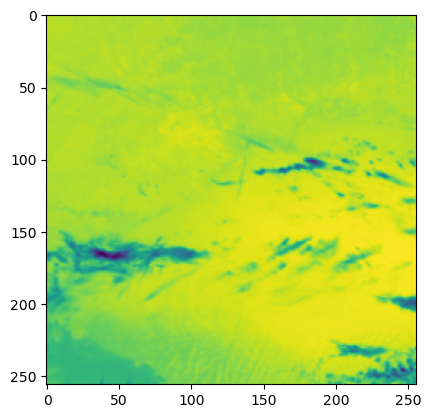

In [9]:
# original image
plt.imshow(img)

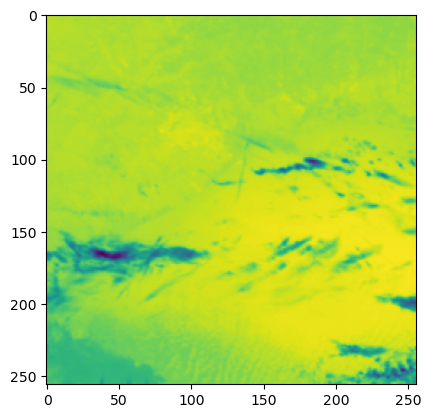

In [61]:
# scaled image
plt.imshow(normalized_image)

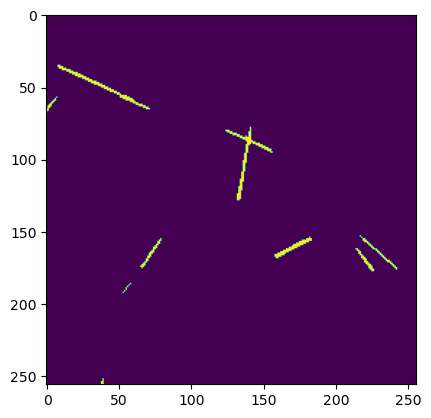

In [10]:
plt.imshow(mask)

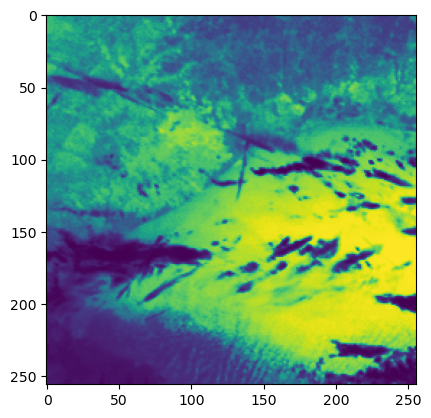

In [62]:
# apply histogram equalization

equalized_img = cv2.equalizeHist(normalized_image)

plt.imshow(equalized_img)

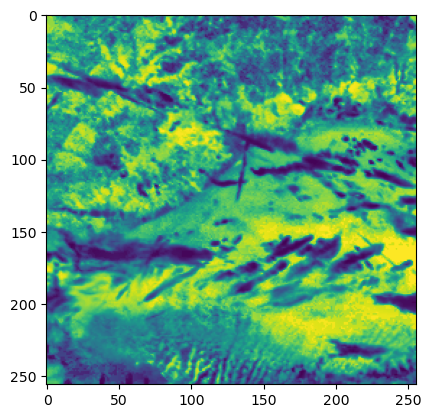

In [70]:
# Apply CLAHE to the equalized image

# Create CLAHE object with parameters of choice
clahe = cv2.createCLAHE(clipLimit=20.0, tileGridSize=(8, 8))

clahe_image = clahe.apply(equalized_img)

plt.imshow(clahe_image)
plt.show()

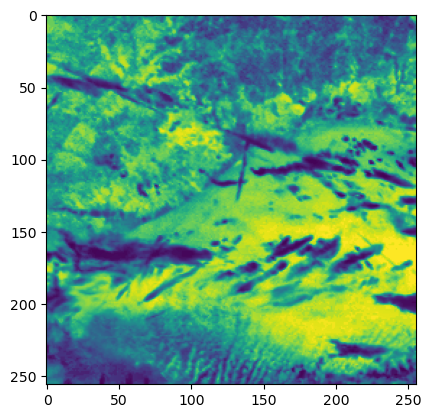

In [71]:
# trying with different clahe values
clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(equalized_img)
plt.imshow(clahe_image)
plt.show()